# Eric He

# Numerical Analysis

# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('darkgrid')

# 1. Let us explore matrix norms and condition numbers.

### a) 
**For the following matrix given by
$A=\begin{bmatrix}
1 & -2\\
3 & -1 \\
\end{bmatrix},$
calculate $\|A\|_1$, $\|A\|_2$, $\|A\|_\infty$ as well as the
condition numbers for each norm by hand. Is $A$ well or
ill-conditioned?**

$A^TA =\begin{bmatrix}
-5 & 0 \\
0 & -5 \\
\end{bmatrix}$

$\|A\|_1 = 4$ (the largest column sum of A)

$\|A\|_2 = \sqrt{5}$ (square root of largest eigenvalue of $A^TA$)

$\|A\|_\infty = 4$ (the largest row sum of A)

$A^{-1}=\begin{bmatrix}
-1/5 & 2/5\\
-3/5 & 1/5 \\
\end{bmatrix}$

$A^{-1T}A^{-1}=\begin{bmatrix}
-1/5 & 0 \\
0 & 1/5 \\
\end{bmatrix}$

$\|A^{-1}\|_1 = 4/5$

$\|A^{-1}\|_2 = \sqrt{1/5}$

$\|A^{-1}\|_\infty = 4/5$

Then we have condition numbers

$\kappa_1(A) = 4(4/5) = 16/5, \kappa_2(A) = 1, \kappa_\infty(A) = 16/5$

### b)
**Recall the formulas from Theorems 2.7 and 2.8 in the text
book. If you assume that taking the absolute value and determining
the maximum does not contribute to the overall computational cost,
how many \textit{flops} (floating point operations) are needed to
calculate $\|A\|_1$ and $\|A\|_\infty$ for
$A\in\mathbb{R^{n\times n}}$? By what factor will the calculation time
increase when you double the size of matrix size?**

For calculating either the $1$-norm or $\infty$-norm, each row/column requires $n - 1$ additions and there are $n$ rows/columns, making $n(n-1)$ operations in total.

By doubling $n$, the number of computations needed quadruples.

### c)
**Now implement a simple code that calculates $\|A\|_1$ and
$\|A\|_\infty$ for a matrix of any size $n\geq 1$. Try to do this
without using loops. Using system sizes of $n_1=100$, $n_{k+1}=2n_k,
k=1,\ldots,7$, determine how long your code takes to calculate $\norm{A}_1$ and $\norm{A}_\infty$
for a matrix $A\in\reals^{n_i\times n_i}$ with random entries and
report the results. Can you confirm the estimate from (b)?**

In [2]:
def norm(A, norm_type='infinity'):
    if norm_type == 'l1':
        return A.sum(axis=0).max()
    else:
        return A.sum(axis=1).max()

time_taken = []
for i in (100 * 2**np.arange(8)):
    A = np.random.rand(i, i)
    start = time.time()
    norm(A)
    norm(A, norm_type='l1')
    end = time.time()
    time_taken.append(end - start)
time_taken

[0.00013208389282226562,
 6.985664367675781e-05,
 0.00017905235290527344,
 0.0006146430969238281,
 0.0023674964904785156,
 0.015721797943115234,
 0.06118583679199219,
 0.25415968894958496]

### d)
**Calculate for the
system sizes in (c) $\|A\|_1$ and $\|A\|_\infty$ using both
your implementation and MATLAB's norm function, determine
for each $n_i$ how long each code takes and plot the results in one
graph. On average, by what factor is MATLAB's implementation faster than
yours?**

In [3]:
time_taken_numpy = []
for i in (100 * 2**np.arange(8)):
    A = np.random.rand(i, i)
    start = time.time()
    np.linalg.norm(A, ord=1)
    np.linalg.norm(A, ord=np.inf)
    end = time.time()
    time_taken_numpy.append(end - start)
time_taken_numpy

[0.0001456737518310547,
 0.00015497207641601562,
 0.0008103847503662109,
 0.003276348114013672,
 0.011749744415283203,
 0.07502365112304688,
 0.29505157470703125,
 1.200286626815796]

Since I'm using vectorised math, it turns out Numpy is slower.

# 2. Let $A, B\in \mathbb R^{n\times n}$ and let the matrix norm $\|\cdot\|$ be induced by the subordinate of a vector norm $\|\cdot\|$.

### a)
**Show that $\|AB\|\le \|A\|\|B\|$.**

$\|AB\| = \max_{v \in \mathbb{C^n}}\dfrac{\|ABv\|}{\|v\|}$. Then we have $\|ABv\| \leq \|AB\|\|v\|$.

### b) 
**For the identity matrix $I\in \mathbb R^{n\times n}$, show
that $\|I\|=1$.**

Let $v$ be any arbitrary vector in $\mathbb{R}^n$.Then $Iv = v$, so $||Iv|| = ||v||$. Then $||I|| = \max_{v \in \mathbb{R}^n}||Iv|| / ||v|| = \max_{v \in \mathbb{R}^n}||v|| / ||v|| = 1$.

### c)
**For $A$ invertible, show that $\kappa(A)\ge 1$, where
$\kappa(A)$ is the condition number of that matrix $A$
corresponding to the norm $\|\cdot\|$. Use the above two
properties with $B:=A^{-1}$ for your argument.**

The condition number $\kappa(A) = ||A||||A^{-1}||$. From a) we know $||AA^{-1}|| = ||I|| = 1 \leq ||A||||A^{-1}|| = \kappa(A)$.

### d)
**Argue that the Frobenius matrix norm
$\|A\|_F:=\left(\sum_{i,j=1}^n a_{ij}^2\right)^{1/2}$ cannot be
induced by a suitable vector norm.**

The Frobenius norm of $I$ is greater than 1 for $n > 1$. By b), the Frobenius norm cannot be a norm induced by a vector norm.

# 3. Estimates for vector and matrix norms.

### a)
**Show that, for any $v \in \mathbb{R^n}$, we have 
$$\|v\|_\infty \leq \|v\|_2 \quad \text{and} \quad
\| v\|_2^2 \leq \| v\|_1 \| v\|_\infty.$$
In each case, give an example of a nonzero $v$ for which equality
is obtained.**

For the first inequality, we trivially see that $\|v\|_2 = (\sum_1^n |v_i|^2)^{1/2} \geq \max_i (|v_i|^2)^{1/2} = \max_i v_i = \|v\|_\infty$.

For the second equality, $\|v\|_2^2 = (\sum_1^n |v_i|^2) \leq \sum_1^n |v_i||max_i v_i| = max_i v_i \sum_1^n |v_i| = \|v\|_1\|v\|_\infty$.

Letting $v$ have $1$ in the first entry and $0$ everywhere else, we can see that equality is obtained for all norms at value $1$. In general, any basis vector $e_i$ will have the same norm of $1$ for any norm, and any constant multiple of the basis vector will have the same norm across norms as well.

### b)
**Let us generalize the definition of matrix norms to
non-square matrices. We define the $\|\cdot\|_p$ matrix norms
($p\in \{1,2,\infty\}$) for an $m\times n$ matrix $A$ by
$$
\|A\|_p = \sup_{v \in \mathbb{R^n}\backslash\{0\}}
\frac{\|Av\|_p}{\|v\|_p}
$$
where the norm in the numerator is defined on $\mathbb{R^m}$ and the
norm in the denominator is defined on $\mathbb{R^n}$. \\
Using the problem above, show that
$$
\|A\|_\infty \leq \sqrt{n}\|A\|_2 \quad \text{and} \quad
\|A\|_2 \leq \sqrt{m}\|A\|_\infty
$$
In each case, give an example of a nonzero matrix $A$ for which equality is obtained.**

Note that $\|v\|_2 \leq (\sum_1^n \max_i v_i^2)^{1/2} = (\sum_1^n\|v\|_\infty^2)^{1/2} = \sqrt{n}\|v\|_\infty$.

For the first inequality, we can see that $\|A\|_\infty = \sup_{v \in \mathbb{R^n}} \dfrac{\|Av\|_\infty}{\|v\|_\infty} \leq \sup_{v \in \mathbb{R^n}} \dfrac{\|Av\|_2}{\|v\|_\infty} \leq \sup_{v \in \mathbb{R^n}} \dfrac{\|Av\|_2}{\frac{1}{\sqrt{n}}\|v\|_2} = \sqrt{n}\|A\|_2$.

Now note that $\|v\|_2^2 \leq \|v\|_1 \|v\|_\infty = \sum_1^m|v_i|\|v\|_\infty \leq m \max_i v_i \|v\|_\infty = m \|v\|_\infty^2$.

$\|A\|_2 = \sup \dfrac{\|Av\|_2}{\|v\|_2} = \sup \sqrt{\dfrac{\|Av\|_2^2}{\|v\|_2^2}} \leq \sup \sqrt{\dfrac{m\|Av\|_\infty^2}{\|v\|_\infty^2}} = \sqrt{m}\|A\|_\infty$.

Let $v = (1, 1, ..., 1)$, $v \in \mathbb{R^m}$. Then $\|v\|_2 = \sqrt{m}$ and $\|v\|_\infty = 1$. Let $v$ be the first column of the matrix $A$; then $A$ sends the basis vector $(1, 0, ..., 0) \in \mathbb{R}^n$ to $v$, giving us equality for $\|A\|_2 = \sqrt{m}\|A\|_\infty$.

# 4. 

### a)
$\|Ax\|_2^2\| = x^TA^TAx = x^T\lambda x = \lambda x^Tx = \lambda\|x\|_2^2$. Only the zero matrix has all eigenvalues $0$, so $\lambda \geq 0$.

### b)
Since $A^TA$ is symmetric, $\|A^TA\|_2$ is the maximum eigenvalue of $A^TA$. Then an arbitrary eigenvalue $\lambda$ is less than $\|A^TA\|_2$.

Then since $\|Ax\|_2^2 = \lambda\|x\|_2^2 \leq \|A^TA\|^{1/2}\|x\|_2 \implies \dfrac{\|Ax\|_2}{\|x\|_2} = \|A\|_2 \leq \|A^TA\|^{1/2}$.

### c)
$\kappa_2 = \|A\|_2\|A^{-1}\|_2 \leq \|A^TA\|^{1/2}\|A^{-1T}A^{-1}\|^{1/2}
\leq \|A^T\|^{1/2}\|A\|^{1/2}\|A{-1}\|^{1/2}\|A^{-1}\|^{1/2} = (\|A\|_1\|A^{-1}\|\|A\|_\infty\|A^{-1}\|_\infty)^{1/2} = (\kappa_1(A)\kappa_\infty(A))^{1/2}$.

# 5.
The inequality is sharp for the largest eigenvector of $A^TA$

# 6.

In [4]:
A = np.array([[9, -6], [12, -8], [0, 20]])
Q, R = np.linalg.qr(A)

In [5]:
Q

array([[-0.6,  0. ],
       [-0.8,  0. ],
       [-0. , -1. ]])

In [6]:
R

array([[-15.,  10.],
       [  0., -20.]])

In [7]:
# q-hat
np.array([[-6, 0, 0.8],
         [-0.8, 0, -0.6],
         [0, -1, 0]])

array([[-6. ,  0. ,  0.8],
       [-0.8,  0. , -0.6],
       [ 0. , -1. ,  0. ]])

In [8]:
# r-hat
np.array([[-15, 10],
          [0, -20],
          [0, 0]])

array([[-15,  10],
       [  0, -20],
       [  0,   0]])

Solution for the vector b

In [9]:
b = np.array([300, 600, 900])

tmp = np.dot(Q.T, b)

np.linalg.solve(R, tmp)

array([74., 45.])

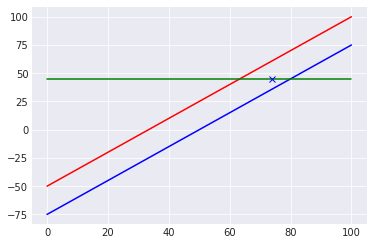

In [10]:
x = np.linspace(0, 100)
y1 = 3/2 * x - 50
y2 = 3/2 * x - 75
y3 = 900/20 * (x - x + 1)
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='blue')
plt.plot(x, y3, color='green')
plt.plot(74, 45, 'bx')

# 7.
$0 = a + d$

$0.2 = ae^{0.5} + \frac{1}{4}b + \frac{1}{2}c + d$

$0.27 = ae + b + c + d$

$0.3 = ae^2 + 4b + 2c + d$

$0.33 = ae^{2.5} + 6.25b + 2.25c + d$

In [11]:
A = np.array([[np.exp(0.5), 1/4, 1/2, 1],
              [np.exp(1), 1, 1, 1],
              [np.exp(1.5), 2.25, 1.5, 1],
              [np.exp(2), 4, 2, 1],
              [np.exp(2.5), 6.25, 2.25, 1]])
b = np.array([0.2, 0.27, 0.3, 0.32, 0.33])

Q, R = np.linalg.qr(A)
coef = np.linalg.solve(R, np.dot(Q.T, b))

In [12]:
coef

array([ 0.08032998, -0.19645026,  0.26424811, -0.01552104])

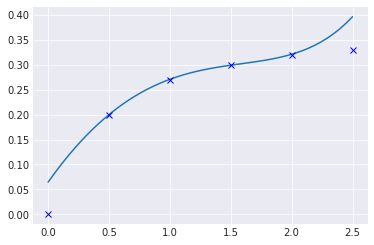

In [13]:
x = np.linspace(0, 2.5)
y = coef[0]*np.exp(x) + coef[1] * np.power(x, 2) + coef[2] * x + coef[3]

plt.plot(x, y)
plt.plot(0, 0, 'bx')
plt.plot(.5, .2, 'bx')
plt.plot(1, .27, 'bx')
plt.plot(1.5, .3, 'bx')
plt.plot(2, .32, 'bx')
plt.plot(2.5, .33, 'bx')